# Digit Recognizer using TensorFlow

In [1]:
# Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
folder = "D:\ProgrammingBigFiles\Kaggle\Digit Recognizer\\"

In [2]:
# Loading database
traindb = pd.read_csv(folder + "train.csv")
finaldb = pd.read_csv(folder + "test.csv")
x_train, y_train = traindb.iloc[:, 1:], traindb.iloc[:, 0]
x_final = finaldb

In [4]:
# Preprocessing
x_train, x_final = x_train / 255.0, x_final / 255.0
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_final = x_final.values.reshape(-1, 28, 28, 1)

# Split classified database into train and test
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

In [5]:
# Model definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (5, 5), padding = "Same", activation = "relu", input_shape = (28, 28, 1)),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (5, 5), padding = "Same", activation = "relu", input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (5, 5), padding = "Same", activation = "relu", input_shape = (28, 28, 1)),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (5, 5), padding = "Same", activation = "relu", input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = "softmax")
])
optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5)

W0803 23:26:25.582632 13440 deprecation.py:506] From C:\Users\Nelson Gomes Neto\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/5
37800/37800 [==============================] - 20s 521us/sample - loss: 0.1781 - acc: 0.9442
Epoch 2/5
37800/37800 [==============================] - 65s 2ms/sample - loss: 0.0659 - acc: 0.9804
Epoch 3/5
37800/37800 [==============================] - 384s 10ms/sample - loss: 0.0590 - acc: 0.9840
Epoch 4/5
37800/37800 [==============================] - 383s 10ms/sample - loss: 0.0584 - acc: 0.9839
Epoch 5/5
37800/37800 [==============================] - 384s 10ms/sample - loss: 0.0528 - acc: 0.9854


In [ ]:
# # Model definition
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
#     tf.keras.layers.Dense(512, activation=tf.nn.relu),
#     tf.keras.layers.Dense(64, activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(x_train, y_train, epochs=5)
# # model.evaluate(x_test)

In [8]:
# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)
datagen.fit(x_train)

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = 86), epochs = 5, validation_data = (x_test, y_test))

Epoch 1/5
439/440 [============================>.] - ETA: 0s - loss: 0.1264 - acc: 0.9629

C:\Users\Nelson Gomes Neto\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


440/440 [==============================] - 283s 643ms/step - loss: 0.1265 - acc: 0.9629 - val_loss: nan - val_acc: 0.0119
Epoch 2/5
440/440 [==============================] - 271s 617ms/step - loss: 0.0863 - acc: 0.9758 - val_loss: nan - val_acc: 0.0119
Epoch 3/5
440/440 [==============================] - 273s 620ms/step - loss: 0.0797 - acc: 0.9778 - val_loss: nan - val_acc: 0.0121
Epoch 4/5
440/440 [==============================] - 271s 616ms/step - loss: 0.0732 - acc: 0.9796 - val_loss: nan - val_acc: 0.0117
Epoch 5/5
440/440 [==============================] - 271s 617ms/step - loss: 0.0704 - acc: 0.9812 - val_loss: nan - val_acc: 0.0117


Accuracy: 0.9930952380952381


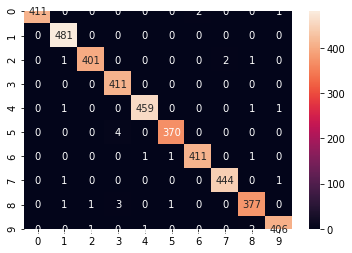

In [9]:
# Test model
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
cf_mtx = confusion_matrix(y_pred, y_test)
sn.heatmap(cf_mtx, annot=True, fmt='d')
print("Accuracy:", accuracy_score(y_pred, y_test))

In [10]:
# Prepare submission
y_final = model.predict(x_final)
y_final = np.argmax(y_final, axis = 1)
image_id = list(range(1, len(y_final) + 1))
df = {"ImageId": image_id, "Label": y_final}
df = pd.DataFrame(df, columns=df.keys())
df.to_csv("submission.csv", index=False)